<img src="tecno.jpg">


# Analisis de Datos Masivos
## Contador SQL de la velocidad de conexion a internet


## Nombre del Docente
### Jose Gabriel Rodriguez Rivas

## Nombre del Alumno
### Gerardo Jael Esquivel Martinez


### Conectarse a la base de datos

In [1]:
# this is the library to talk to the database
import sqlite3
import pandas as pd
# this is a library for data vizualization
from matplotlib import pyplot as plt
# this is to say that we want our plots to be part of this page, and not opened in a new window
%matplotlib inline

In [2]:
conn = sqlite3.connect('C:/Users/USUARIO/Documents/OCTAVO SEMESTRE/Analisis de datos masivos/Practicas Jupyter U2/InternetSpeed.db')

In [3]:
cur = conn.cursor()

In [4]:
consulta = 'SELECT DateTime FROM LA_wifi_speed_UK LIMIT 10;'
cur.execute(consulta)

In [5]:
for row in cur:
    print(row)

('2016-11-23 00:00:00.000000',)
('2016-11-23 00:30:00.000000',)
('2016-11-23 01:00:00.000000',)
('2016-11-23 01:30:00.000000',)
('2016-11-23 02:00:00.000000',)
('2016-11-23 02:30:00.000000',)
('2016-11-23 03:00:00.000000',)
('2016-11-23 03:30:00.000000',)
('2016-11-23 04:00:00.000000',)
('2016-11-23 04:30:00.000000',)


In [6]:
consulta = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY RANDOM() LIMIT 10'
cur.execute(consulta)

for row in cur:
    print (row)

('2016-12-11 08:00:00.000000',)
('2016-12-13 09:30:00.000000',)
('2016-12-11 17:30:00.000000',)
('2016-12-12 20:00:00.000000',)
('2016-11-30 22:30:00.000000',)
('2016-11-26 04:00:00.000000',)
('2016-12-09 04:00:00.000000',)
('2016-11-30 13:30:00.000000',)
('2016-11-25 16:00:00.000000',)
('2016-12-01 17:30:00.000000',)


In [7]:
consulta = 'SELECT * FROM LA_wifi_speed_UK LIMIT 1'
cur.execute(consulta)

cur.description[:10]

(('E07000223_p', None, None, None, None, None, None),
 ('E07000026_p', None, None, None, None, None, None),
 ('E07000032_p', None, None, None, None, None, None),
 ('E07000224_p', None, None, None, None, None, None),
 ('E07000170_p', None, None, None, None, None, None),
 ('E07000105_p', None, None, None, None, None, None),
 ('E07000004_p', None, None, None, None, None, None),
 ('E07000200_p', None, None, None, None, None, None),
 ('E09000002_p', None, None, None, None, None, None),
 ('E09000003_p', None, None, None, None, None, None))

In [10]:
columns = [member[0] for member in cur.description]
columns = columns[1:]
columns

['E07000026_p',
 'E07000032_p',
 'E07000224_p',
 'E07000170_p',
 'E07000105_p',
 'E07000004_p',
 'E07000200_p',
 'E09000002_p',
 'E09000003_p',
 'E08000016_p',
 'E07000027_p',
 'E07000066_p',
 'E07000084_p',
 'E07000171_p',
 'E06000022_p',
 'E06000055_p',
 'E09000004_p',
 'E08000025_p',
 'E07000129_p',
 'E06000008_p',
 'E06000009_p',
 'E07000033_p',
 'E08000001_p',
 'E07000136_p',
 'E06000028_p',
 'E06000036_p',
 'E08000032_p',
 'E07000067_p',
 'E07000143_p',
 'E09000005_p',
 'E07000068_p',
 'E06000043_p',
 'E06000023_p',
 'E07000144_p',
 'E09000006_p',
 'E07000234_p',
 'E07000095_p',
 'E07000172_p',
 'E07000117_p',
 'E08000002_p',
 'E08000033_p',
 'E07000008_p',
 'E09000007_p',
 'E07000192_p',
 'E07000106_p',
 'E07000028_p',
 'E07000069_p',
 'E06000056_p',
 'E07000130_p',
 'E07000070_p',
 'E07000078_p',
 'E07000177_p',
 'E06000049_p',
 'E06000050_p',
 'E07000034_p',
 'E07000225_p',
 'E07000005_p',
 'E07000118_p',
 'E07000048_p',
 'E09000001_p',
 'E07000071_p',
 'E07000029_p',
 'E07000

In [11]:
# remove suffix '_p'
columns = [c.replace('_p', '') for c in columns]
# remove suffix '_d'
columns = [c.replace('_d', '') for c in columns]
# remove suffix '_u'
columns = [c.replace('_u', '') for c in columns]
# this operation is to remove duplicates
columns = list(set(columns))

In [12]:
# visualize the first 10 areas
columns[:10]

['E07000187',
 'E07000223',
 'E07000124',
 'E07000125',
 'E07000063',
 'E06000026',
 'E07000239',
 'E06000042',
 'E06000022',
 'E07000212']

In [13]:
area = columns[0]
print(area)

E07000187


In [14]:
suffix = {'_p':'ping', '_d':'download', '_u':'upload'}
# we have the suffixes as the keys of the dictionary
print (suffix.keys() )

# we have the complete names as the values of the dictionary
print (suffix.values() )

dict_keys(['_p', '_d', '_u'])
dict_values(['ping', 'download', 'upload'])


In [15]:
area = columns[0]
print(area)

E07000187


Text(0.5, 1.0, 'E07000187')

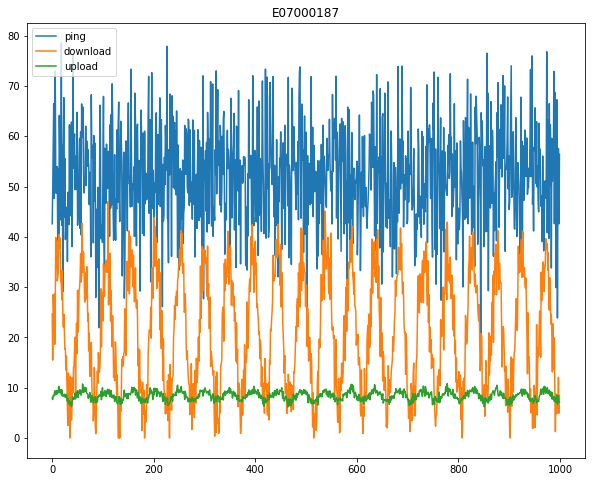

In [18]:
area = columns[0]
plt.figure(figsize=(10, 8))

# Plot each variable in suffix.keys() for each area
for s in suffix.keys():
    consulta = 'SELECT "{}{}" FROM LA_wifi_speed_UK ORDER BY DateTime'.format(area, s)
    cur.execute(consulta)
    plt.plot(list(cur.fetchall()), label=suffix[s])
plt.legend()
plt.title(area)

### Parte 2: Manipule los datos con pandas

In [19]:
new_columns = ['Area', 'Ping_promedio', 'Descarga_promedio', 'Carga_promedio']

df = pd.DataFrame(columns = new_columns)
df

,Area,Ping_promedio,Descarga_promedio,Carga_promedio


In [21]:
for i in range(len(columns)-1):
    tmp_list = []
    tmp_list.append(columns[i])
    for s in suffix.keys():
        consulta = 'SELECT AVG("{}{}") FROM LA_wifi_speed_UK'.format(columns[i], s)
        
        cur.execute(consulta)
        
        mean = cur.fetchone()
        tmp_list.append(mean[0])
    #append the columns to the empty DataFrame
    df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
# visualize the head of the dataframe here
df.head()

,Area,Ping_promedio,Descarga_promedio,Carga_promedio
0,E07000187,51.937527,21.127505,8.405785
1,E07000223,50.923624,20.453399,8.241653
2,E07000124,50.221057,20.759189,8.181407
3,E07000125,52.080847,20.440484,8.243290
4,E07000063,51.435449,20.787431,8.378082


In [22]:
len(df)

326

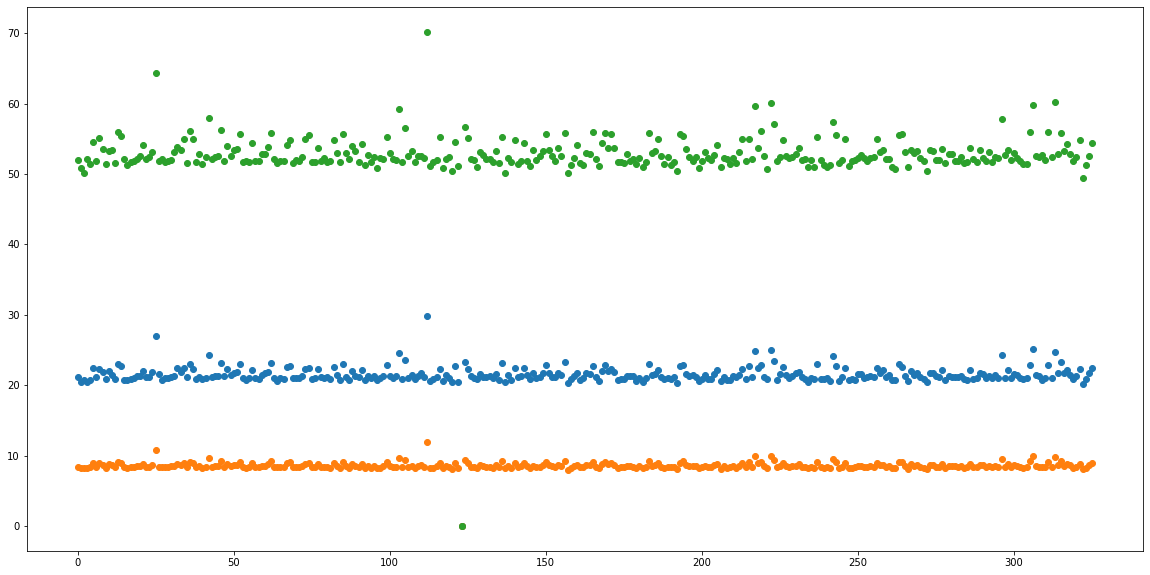

In [26]:
plt.figure(figsize=(20,10))
plt.plot(df.index, df[['Descarga_promedio','Carga_promedio','Ping_promedio']], 'o')

In [27]:
# Make sure to drop the table first if it already exists
try:
    cur.execute('DROP TABLE average_speed')
except:
    pass

# what is the name of the table you want to save? To what connection?
# Save the dataframe table into a SQL table
df.to_sql('average_speed', conn)

In [28]:
# just checking everything worked fine: select everything from the table we just created
# and then print the first two rows of the result

query_2 = 'SELECT * FROM average_speed'
cur.execute(query_2)

# print the first fetched record
print(cur.fetchone())
# print the next fetched record
print(cur.fetchone())

(0, 'E07000187', 51.93752708793751, 21.127505336100015, 8.405784621530637)
(1, 'E07000223', 50.92362409905345, 20.453398977533574, 8.241652932074452)


### Parte 4: Una las tablas con pandas

In [29]:
query = 'SELECT * FROM LA_population LIMIT 10'
cur.execute(query)
for row in cur:
    print(row)

('Aberdeen City', 'S12000033', 222793)
('Aberdeenshire', 'S12000034', 252973)
('Adur', 'E07000223', 61182)
('Allerdale', 'E07000026', 96422)
('Amber Valley', 'E07000032', 122309)
('Angus', 'S12000041', 115978)
('Antrim and Newtownabbey', 'N09000001', 138567)
('Ards and North Down', 'N09000011', 156672)
('Argyll and Bute', 'S12000035', 88166)
('Armagh City, Banbridge and Craigavon', 'N09000002', 199693)


In [30]:
query = 'SELECT * FROM average_speed JOIN LA_population ON LA_population."LA_code"=average_speed.Area'

cur.execute(query)
k = 0
for row in cur:
    if k>10:
        break
    print(row)
    
    k+=1

(0, 'E07000187', 51.93752708793751, 21.127505336100015, 8.405784621530637, 'Mendip', 'E07000187', 109279)
(1, 'E07000223', 50.92362409905345, 20.453398977533574, 8.241652932074452, 'Adur', 'E07000223', 61182)
(2, 'E07000124', 50.22105700696352, 20.759189346942872, 8.181407344034819, 'Ribble Valley', 'E07000124', 57132)
(3, 'E07000125', 52.08084728385311, 20.44048393170487, 8.243290314570519, 'Rossendale', 'E07000125', 67982)
(4, 'E07000063', 51.435448880321545, 20.787430500546684, 8.378082215830847, 'Lewes', 'E07000063', 97502)
(5, 'E06000026', 54.52982796630834, 22.44103796760015, 8.949489897392965, 'Plymouth', 'E06000026', 256384)
(6, 'E07000239', 51.81409440834143, 21.153077613649238, 8.365717274022394, 'Wyre Forest', 'E07000239', 97975)
(7, 'E06000042', 55.12785227967782, 22.3174764838662, 8.911097493192544, 'Milton Keynes', 'E06000042', 248821)
(8, 'E06000022', 53.60353016787772, 21.88471554976137, 8.63837469516141, 'Bath and North East Somerset', 'E06000022', 176016)
(9, 'E070002